# LOAD DATA SET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading data

In [2]:
df = pd.read_csv(r"C:\Users\lalit\Downloads\amazon.csv")


In [3]:
print(df.head(2))

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   

                                           user_name  \
0  Man

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# data cleaning

In [5]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [6]:
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

print(df['rating_count'].head())


0    24269.0
1    43994.0
2     7928.0
3    94363.0
4    16905.0
Name: rating_count, dtype: float64


In [7]:
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

print(df['rating_count'].head())


0    24269.0
1    43994.0
2     7928.0
3    94363.0
4    16905.0
Name: rating_count, dtype: float64


In [8]:
df['rating_count'].fillna(df['rating_count'].mean(), inplace=True)


In [9]:
df.dropna(subset=['product_id', 'user_id'], inplace=True)


# discount distribution

In [10]:
df['actual_price'] = df['actual_price'].replace('[^0-9.]', '', regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].replace('[^0-9.]', '', regex=True).astype(float)

df['discount_amount'] = df['actual_price'] - df['discounted_price']

print(df[['actual_price', 'discounted_price', 'discount_amount']].head())


   actual_price  discounted_price  discount_amount
0        1099.0             399.0            700.0
1         349.0             199.0            150.0
2        1899.0             199.0           1700.0
3         699.0             329.0            370.0
4         399.0             154.0            245.0


C:\Users\lalit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


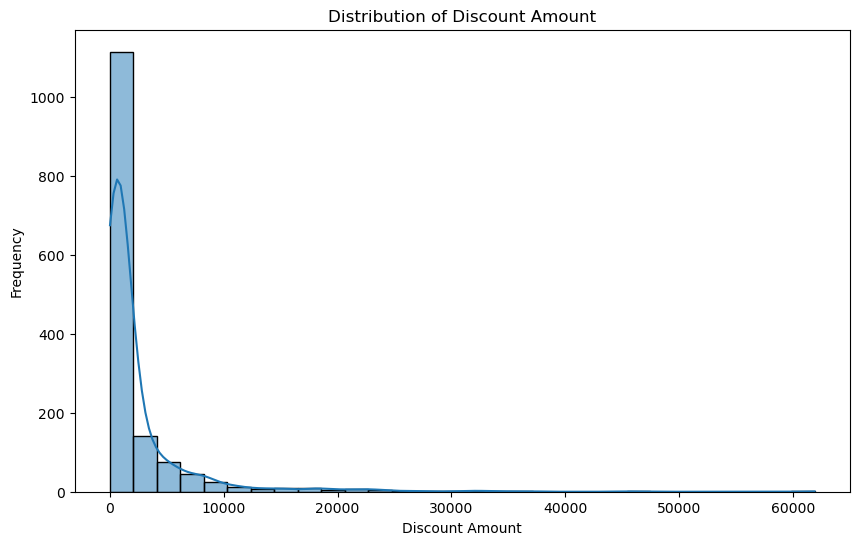

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_amount'], bins=30, kde=True)
plt.title('Distribution of Discount Amount')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.show()

In [12]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

print("Average Discount by Category:\n", avg_discount_by_category)


Average Discount by Category:
                                               category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


In [13]:
print("Average Discount by Category:\n", avg_discount_by_category)

Average Discount by Category:
                                               category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


In [14]:
top_products_by_reviews = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Review Count:\n", top_products_by_reviews)


Top 10 Products by Review Count:
 product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)                                                                             363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)      

# top products by reviews

C:\Users\lalit\AppData\Local\Temp\ipykernel_3232\372398994.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


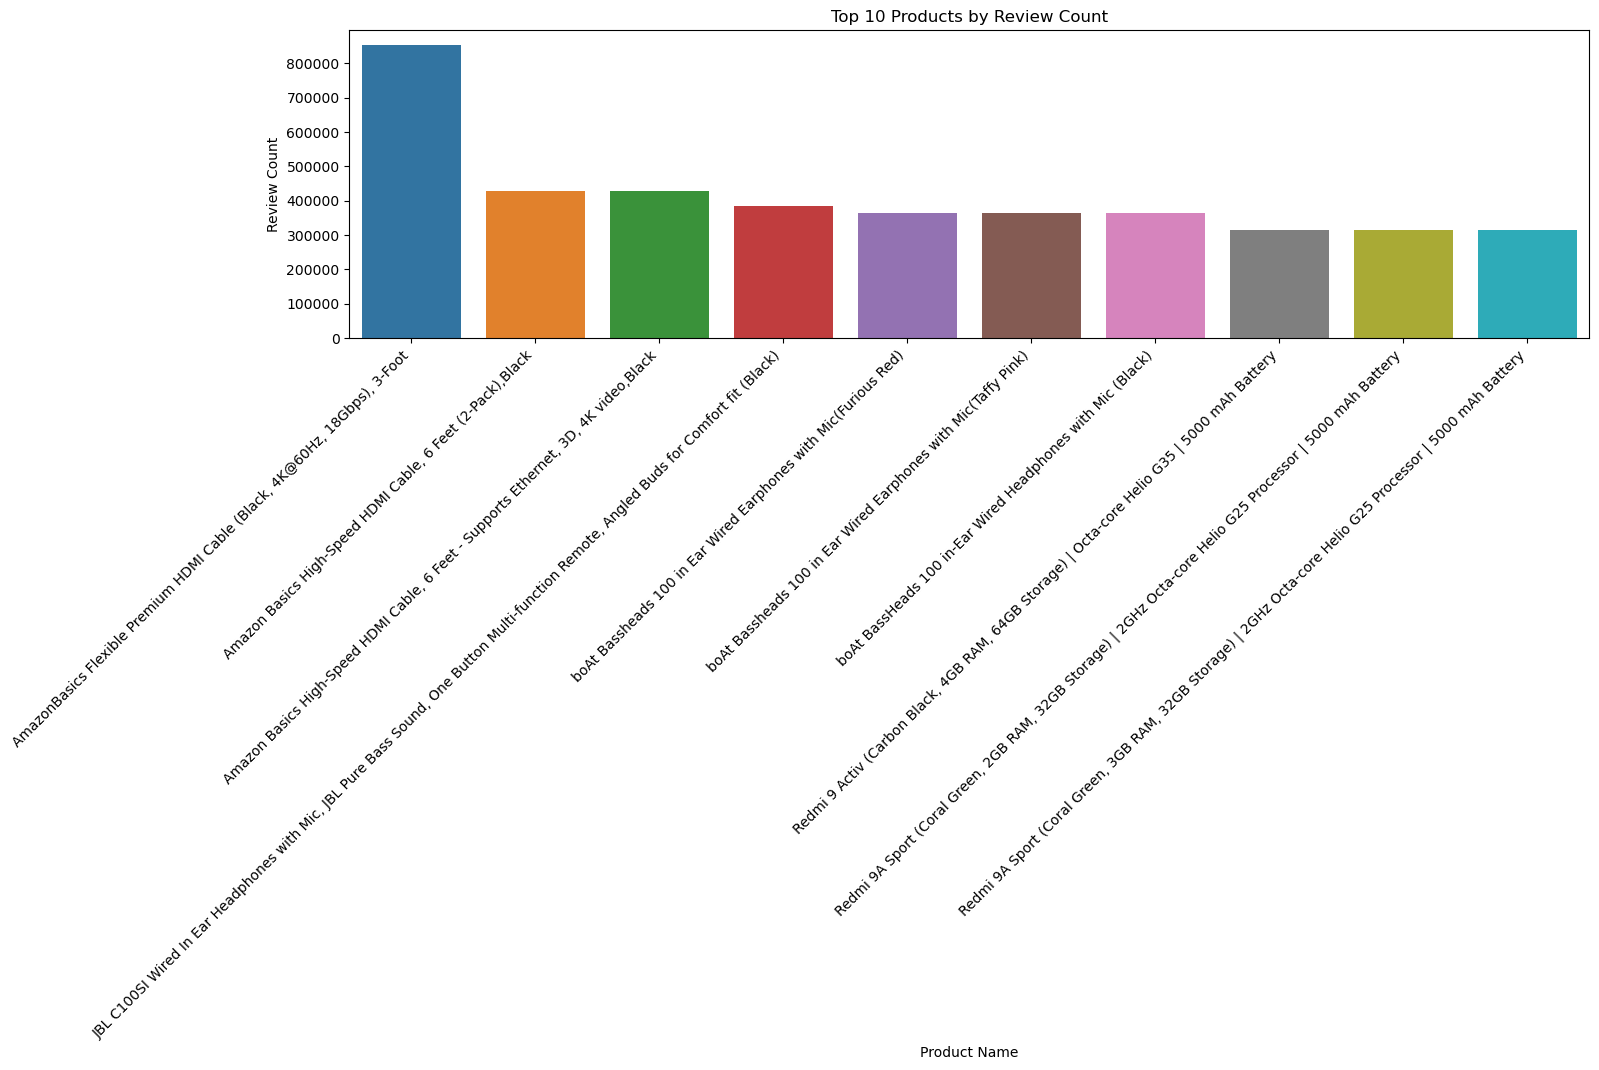

In [38]:
plt.figure(figsize=(16, 4))  
sns.barplot(x=top_products_by_reviews.index, y=top_products_by_reviews.values)
plt.title('Top 10 Products by Review Count')
plt.xlabel('Product Name')
plt.ylabel('Review Count')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


# ratings distribution of products

In [17]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

print(df['rating'].isna().sum())


1


In [18]:
avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()
print("Average Rating by Category:\n", avg_rating_by_category)

Average Rating by Category:
                                               category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


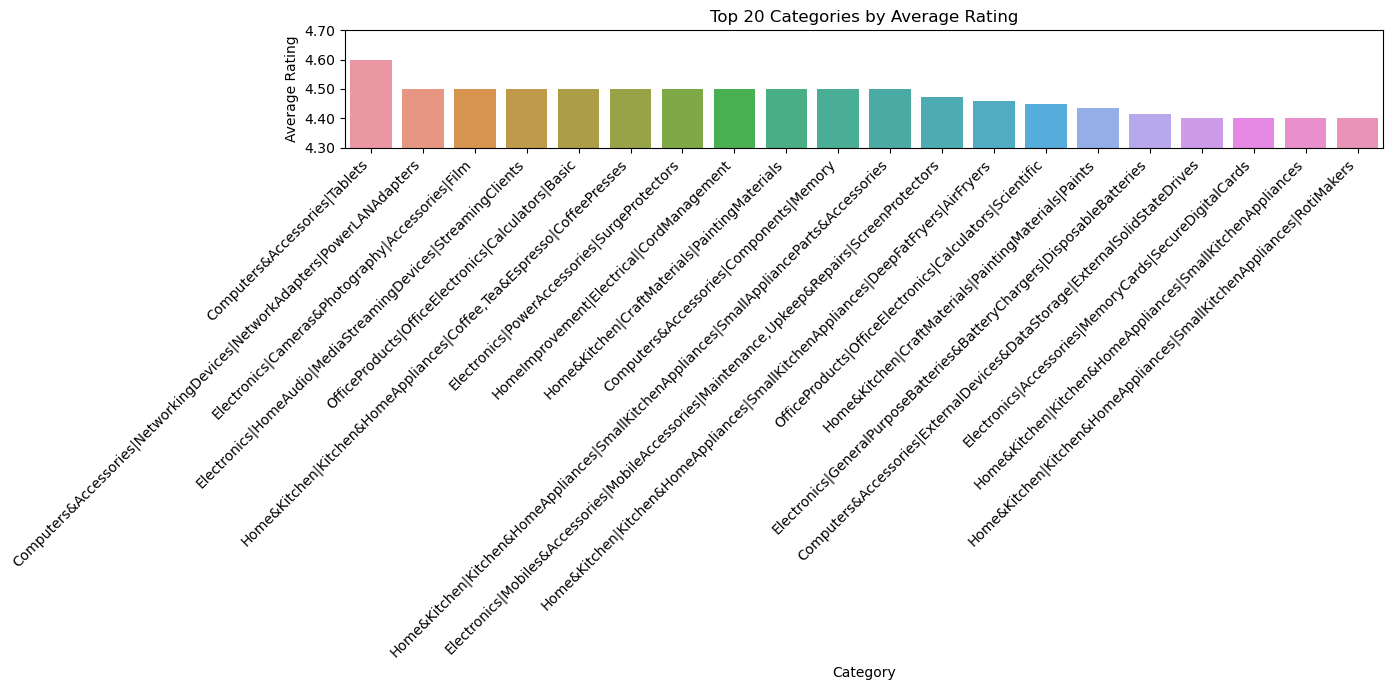

In [23]:
top_20_avg_rating_by_category = avg_rating_by_category.sort_values(by='rating', ascending=False).head(20)

plt.figure(figsize=(14, 7))  
sns.barplot(x='category', y='rating', data=top_20_avg_rating_by_category)
plt.title('Top 20 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')

plt.ylim(top_20_avg_rating_by_category['rating'].min() - 0.1, top_20_avg_rating_by_category['rating'].max() + 0.1)

plt.xticks(rotation=45, ha='right')  


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.tight_layout()  
plt.show()


# correlation matrix

Correlation Matrix:
                      discount_percentage  rating_count    rating
discount_percentage             1.000000      0.011676 -0.155375
rating_count                    0.011676      1.000000  0.101402
rating                         -0.155375      0.101402  1.000000


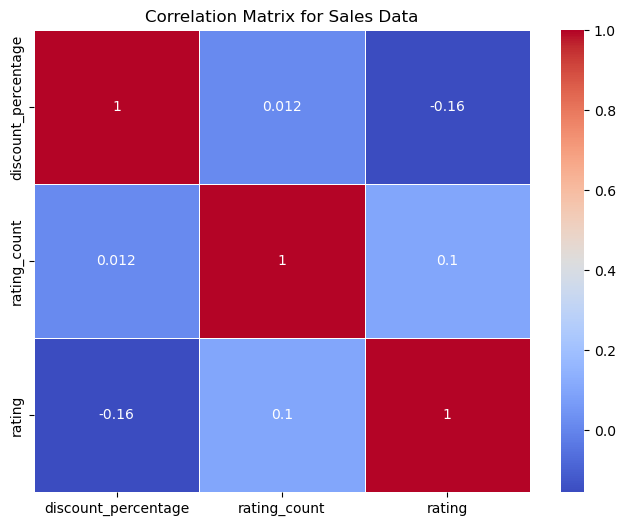

In [22]:
correlation_matrix = df[['discount_percentage', 'rating_count', 'rating']].corr()
print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Sales Data')
plt.show()

